In [4]:
import pandas as pd
import numpy as np

In [6]:
df_path = "input/ZA5798_v1-0-0.dta" # url: https://search.gesis.org/research_data/ZA5798
df = pd.read_stata(df_path, convert_categoricals = False)
print(df.shape)

(26573, 226)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26573 entries, 0 to 26572
Columns: 226 entries, studyno to wex
dtypes: float64(104), int16(2), int32(2), int8(116), object(2)
memory usage: 24.9+ MB


In [8]:
df.columns

Index(['studyno', 'version', 'survey', 'caseid', 'uniqid', 'countid',
       'country', 'isocntry', 'phone', 'q1',
       ...
       'w14', 'w22', 'w24', 'w29', 'w30', 'w81', 'w82', 'w89', 'w90', 'wex'],
      dtype='object', length=226)

In [9]:
df.columns.values.tolist()

['studyno',
 'version',
 'survey',
 'caseid',
 'uniqid',
 'countid',
 'country',
 'isocntry',
 'phone',
 'q1',
 'q2_1',
 'q2_2',
 'q2_3',
 'q2_4',
 'q2b',
 'q2c',
 'q2d',
 'q3',
 'q4_1',
 'q4_2',
 'q4_3',
 'q4_4',
 'q4_5',
 'q4_6',
 'q4_7',
 'q4_8',
 'q4_9',
 'q5',
 'q6',
 'q7_1',
 'q7_2',
 'q7_3',
 'q7_4',
 'q7_5',
 'q7_6',
 'q7_7',
 'q7_8',
 'q7_9',
 'q7_10',
 'q7_11',
 'q8_1',
 'q8_2',
 'q8_3',
 'q8_4',
 'q8_5',
 'q8_6',
 'q8_7',
 'q8_8',
 'q8_9',
 'q8_10',
 'q9',
 'q10',
 'q11_1',
 'q11_2',
 'q11_3',
 'q11_4',
 'q11_5',
 'q11_6',
 'q11_7',
 'q11_8',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18_1',
 'q18_2',
 'q18_3',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'vd1',
 'd1r1',
 'd1r2',
 'd2',
 'd3a_1',
 'd3a_2',
 'd3a_3',
 'd3a_4',
 'd3a_5',
 'd3a_6',
 'd3a_7',
 'd3a_8',
 'd3a_9',
 'd3a_10',
 'd3a_11',
 'd3a_12',
 'd3a_13',
 'd3a_14',
 'd3a_15',
 'd3a_16',
 'd3a_17',
 'd3a_18',
 'd3a_19',
 'd3a_20',
 'd3a_21',
 'd3a_22',
 'd3a_23',
 'd3a_24',
 'd3a_25',
 'd3a_26',
 'd3a_27',
 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Missing values in training Data')

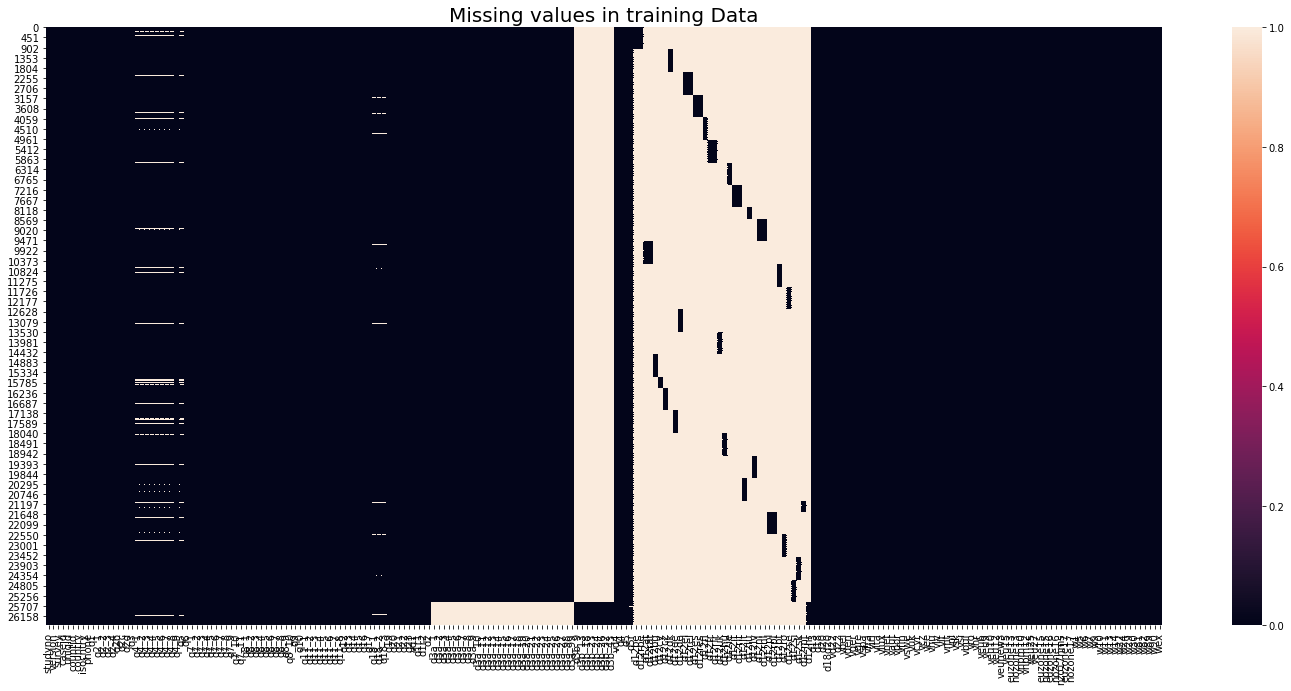

In [10]:
#code copied from https://www.kaggle.com/usharengaraju/wids2022-lgbm-starter-w-b
names = df.columns
plt.figure(figsize = (25,11))
sns.heatmap(df.isna().values, xticklabels=df.columns)
plt.title("Missing values in Data", size=20)

In [10]:
# number of observations per country
df.groupby(by = 'isocntry').size()
# store as df
df.groupby(by = 'isocntry').size().reset_index(name = 'counts')

,isocntry,counts
0,AT,1002
1,BE,1001
2,BG,1003
3,CY,503
4,CZ,1000
5,DE,1001
6,DK,1018
7,EE,1000
8,ES,1000
9,FI,1001


In [12]:
# check queries
# https://coderzcolumn.com/tutorials/python/pandas-query-function-query-pandas-dataframe-using-python-expressions
sel_countries = ["ES", "GB"]
df_analysis = df.query('isocntry in @sel_countries') # selected countries

In [13]:
# number of observations per country
df_analysis.groupby(by = 'isocntry').size()
# store as df
df_analysis.groupby(by = 'isocntry').size().reset_index(name = 'counts')

,isocntry,counts
0,ES,1000
1,GB,1001


In [14]:
df_analysis.groupby('isocntry')['q6'].value_counts(normalize = True)

isocntry  q6
ES        2     0.409000
          1     0.311000
          3     0.196000
          4     0.037000
          5     0.030000
          6     0.017000
GB        2     0.413586
          1     0.257742
          3     0.216783
          4     0.052947
          6     0.029970
          5     0.028971
Name: q6, dtype: float64

In [15]:
df_analysis.to_csv("input/data.csv") #output data

In [22]:
questions = ["uniqid","isocntry", "q2_1", "q4_1", "q4_2", "q4_3", "q4_4", "q4_5", "q4_7", "q4_8", "q10", "q5", "q6"]
df_final = df_analysis.filter(questions)
df_final

,uniqid,isocntry,q2_1,q4_1,q4_2,q4_3,q4_4,q4_5,q4_7,q4_8,q10,q5,q6
3021,5001464,ES,3,5.0,2.0,2.0,2.0,2.0,2.0,3.0,4,2.0,2
3022,5001499,ES,2,3.0,1.0,2.0,3.0,2.0,1.0,4.0,3,3.0,2
3023,5001680,ES,1,3.0,2.0,1.0,3.0,1.0,2.0,3.0,2,2.0,1
3024,5001494,ES,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1,2.0,2
3025,5010271,ES,4,2.0,1.0,1.0,2.0,4.0,3.0,3.0,3,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14538,15160446,GB,4,2.0,1.0,2.0,1.0,2.0,1.0,3.0,4,2.0,4
14539,15019769,GB,1,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2.0,2
14540,15148812,GB,1,2.0,3.0,2.0,3.0,1.0,4.0,3.0,3,2.0,3
14541,15132165,GB,2,2.0,2.0,2.0,2.0,1.0,2.0,3.0,3,2.0,3
